<a href="https://colab.research.google.com/github/sadia-afrin-mim/NN/blob/main/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter a value
106
The value that the image contain is:  4


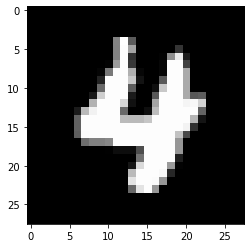

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

dataSet = pd.read_csv('/content/trainingData.csv')
ModifiedData = np.array(dataSet)
np.random.shuffle(ModifiedData) # shuffle before splitting into dev and training sets
dim1, dim2 = ModifiedData.shape
devi_data = ModifiedData[0:1000].T
X_Axis_deviation = devi_data[1:dim2]
Y_Axis_deviation = devi_data[0]
lim =255
X_Axis_deviation = X_Axis_deviation / lim

data_train = ModifiedData[1000:dim1].T
y_axis_training = data_train[0]
x_axis_training = data_train[1:dim2]
x_axis_training = x_axis_training / lim
_, dim1_train = x_axis_training.shape
y_axis_training

def forwardPropagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    maxVal = np.maximum(Z1, 0)
    Z2 = W2.dot(maxVal) + b2
    sumVal = np.exp(Z2) / sum(np.exp(Z2))
    return Z1, maxVal, Z2, sumVal

def backwardPropagation(Z1, t1, Z2, t2, W1, W2, X, Y):
    Y_Val = np.zeros((Y.size, Y.max() + 1))
    Y_Val[np.arange(Y.size), Y] = 1
    Y_Val = Y_Val.T
    Dz = t2 - Y_Val
    Dw = 1 / dim1 * Dz.dot(t1.T)
    Db = 1 / dim1 * np.sum(Dz)
    checker = Z1>0
    Z_dev1 = W2.T.dot(Dz) * checker
    weightDev = 1 / dim1 * Z_dev1.dot(X.T)
    db1 = 1 / dim1 * np.sum(Z_dev1)
    return weightDev, db1, Dw, Db

def accuracyFunc(pred, X):
    n = X.size
    return np.sum(pred == X) / n

def gradDec(X, Y, rewardFactor, itrLim):
    rate = 0.5
    dec = 10
    param1= 784
    W1 = np.random.rand(dec, param1) - rate
    param2 =1
    b1 = np.random.rand(dec, param2) - rate
    W2 = np.random.rand(dec, dec) - rate
    b2 = np.random.rand(dec,param2) - rate

    for itr in range(itrLim):
        Z1, A1, Z2, A2 = forwardPropagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1 = W1 - rewardFactor * dW1
        b1 = b1 - rewardFactor * db1
        W2 = W2 - rewardFactor * dW2
        b2 = b2 - rewardFactor * db2
    return W1, b1, W2, b2
misc = 0.10
n= 500
W1, b1, W2, b2 = gradDec(x_axis_training, y_axis_training, misc, n)


def predictionFunction(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(W1, b1, W2, b2, X)
    predictVal = np.argmax(A2, 0)
    return predictVal


def main_pred_func(point, W1, b1, W2, b2):
    dim =28
    current_image = x_axis_training[:, point, None]
    prediction = predictionFunction(x_axis_training[:, point, None], W1, b1, W2, b2)
    label = y_axis_training[point]
    
    print("The value that the image contain is: ", label)

    sample_img = x_axis_training[:, point, None]
    sample_img = sample_img.reshape((dim,dim)) * lim
    plt.gray()
    plt.imshow(sample_img, interpolation='nearest')
    plt.show()
    predDeviation = predictionFunction(X_Axis_deviation, W1, b1, W2, b2)
    accuracyFunc(predDeviation, Y_Axis_deviation)

print("enter a value")
value = input()
ult_val = int(value)
main_pred_func(ult_val, W1, b1, W2, b2)